Importar librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Leemos el archivo csv de entrenamiento

In [2]:
df = pd.read_csv('train_housing_data_italy.csv')
df.head()

,timestamp,location,title,price,n_rooms,floor,mq,n_bathrooms,year_of_construction,availability,...,has_balcony,has_fireplace,has_alarm,has_air_conditioning,has_pool,has_parking,has_elevator,is_furnished,latitude,longitude
0,1.661114e+09,siculiana,"villa unifamiliare via campo spoto 38, siculiana",46000.0,4.0,NaN,85.0,2.0,NaN,not free / other,...,0,0,0,0,0,0,0,0,37.338086,13.421996
1,1.661114e+09,strongoli,"quadrilocale contrada tronga 211, tronca, stro...",120000.0,4.0,2.0,190.0,2.0,NaN,not free / other,...,0,0,0,0,0,0,0,0,39.263959,17.052026
2,1.661114e+09,zelbio,"bilocale buono stato, piano terra, zelbio",55000.0,2.0,NaN,85.0,1.0,NaN,not free / other,...,0,1,0,1,0,0,0,0,45.904582,9.180539
3,1.661114e+09,villamagna,"casa colonica, da ristrutturare, 319 m², villa...",130000.0,4.0,NaN,319.0,1.0,NaN,not free / other,...,0,0,0,0,0,0,0,0,42.333295,14.236808
4,1.661114e+09,vallefiorita,"appartamento corso italia, vallefiorita",30000.0,NaN,NaN,143.0,2.0,NaN,not free / other,...,0,0,0,1,0,0,0,0,38.776385,16.461003


Realizamos un pequeño análisis exploratorio para ver los valores con los que estaremos trabajando.

In [3]:
df.nunique()

,0
timestamp,42196
location,7023
title,190951
price,2785
n_rooms,4
floor,22
mq,976
n_bathrooms,3
year_of_construction,387
availability,1


Aquí hago un drop de algunas columnas que consideré que no nos serían de utilidad para este ejercicio.

In [4]:
df2 = df.drop(columns=['timestamp','title','availability','status','location'])

Continúamos con la exploración.

In [5]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213409 entries, 0 to 213408
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 175931 non-null  float64
 1   n_rooms               155561 non-null  float64
 2   floor                 144307 non-null  float64
 3   mq                    209520 non-null  float64
 4   n_bathrooms           199605 non-null  float64
 5   year_of_construction  213399 non-null  float64
 6   energy_class          212761 non-null  object 
 7   heating               213409 non-null  object 
 8   has_garage            213409 non-null  int64  
 9   has_terrace           213409 non-null  int64  
 10  has_garden            213409 non-null  int64  
 11  has_balcony           213409 non-null  int64  
 12  has_fireplace         213409 non-null  int64  
 13  has_alarm             213409 non-null  int64  
 14  has_air_conditioning  213409 non-null  int64  
 15  

Tenemos algunos valores nulos en nuestros datos. La manera en que se manejaran es importante, iniciando con la columna de **precio**, la cual nos desharemos de los valores nulos. Esto por que consideré que llenar los datos nulos con el promedio de precios podría influir de manera negativa en nuestro entrenamiento.

In [6]:
df2.dropna(subset=['price'], inplace=True)

Vemos una descripción general de nuestras columnas, para ver que otras mejoras podemos hacer antes de empezar a trabajar con ellas.

In [7]:
df2.describe()

,price,n_rooms,floor,mq,n_bathrooms,year_of_construction,has_garage,has_terrace,has_garden,has_balcony,has_fireplace,has_alarm,has_air_conditioning,has_pool,has_parking,has_elevator,is_furnished,latitude,longitude
count,1.759310e+05,131783.000000,118801.000000,173392.000000,165510.000000,175922.000000,175931.000000,175931.000000,175931.000000,175931.000000,175931.000000,175931.000000,175931.000000,175931.000000,175931.000000,175931.000000,175931.000000,175881.000000,175881.000000
mean,2.413253e+05,3.477535,1.815633,157.345385,1.582714,1964.273405,0.197191,0.123145,0.184379,0.109617,0.063343,0.010533,0.316766,0.022571,0.017729,0.065185,0.077025,43.821189,11.152948
std,7.739356e+06,0.979225,1.152741,126.112364,0.664523,77.490135,0.397879,0.328604,0.387794,0.312412,0.243580,0.102087,0.465217,0.148533,0.131963,0.246852,0.266631,2.321917,2.613730
min,1.000000e+00,2.000000,1.000000,1.000000,1.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.511134,6.703205
25%,7.700000e+04,3.000000,1.000000,80.000000,1.000000,1960.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.409359,9.078015
50%,1.350000e+05,3.000000,2.000000,117.000000,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.788443,10.728639
75%,2.350000e+05,4.000000,2.000000,188.000000,2.000000,2002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,45.589675,12.967383
max,2.147484e+09,5.000000,52.000000,999.000000,3.000000,2209.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.003740,18.492161


Aquí hacemos algo de limpieza para los datos:

*   Los datos de la columna "año de construcción" mayores al año actual 2024, se toman como errores y por lo tanto no los usaremos. Adicionalmente llenaremos aquellos que están vacíos con el año promedio, 1964.
*   Número de cuartos: Llenaremos los datos faltante con el número promedio de cuartos, 3.
* Piso: Se utilizará también el promedio, el cual es 2.
* Metros cuadrados: También se rellenaran con el dato promedio, 157.
* Finalmente el número de baños se tomará como 1.



In [ ]:
df2 = df2[df2['year_of_construction'] <= 2024]
df2.fillna({'year_of_construction' : 1964}, inplace=True)

df2.fillna({'n_rooms' : 3}, inplace=True)

df2.fillna({'floor' : 2}, inplace=True)

df2.fillna({'mq' : 157}, inplace=True)

df2.fillna({'n_bathrooms' : 1}, inplace=True)

También transformaremos nuestros datos para que todos sean de tipo entero y poder manejarlos más fácilmente.

In [9]:
df2['price'] = df2['price'].astype('Int64')
df2['n_rooms'] = df2['n_rooms'].astype('Int64')
df2['floor'] = df2['floor'].astype('Int64')
df2['mq'] = df2['mq'].astype('Int64')
df2['n_bathrooms'] = df2['n_bathrooms'].astype('Int64')
df2['year_of_construction'] = df2['year_of_construction'].astype('Int64')

Nos desharemos de los valores nulos en las columnas de valores de energía, latitud y longitud.

In [10]:
df2.dropna(subset=['energy_class'], inplace=True)
df2.dropna(subset=['latitude'], inplace=True)
df2.dropna(subset=['longitude'], inplace=True)

Haremos un análisis de la columna de precios, para ver como podemos mejorarla ya que entre sus valores se encuentran varios outliers.

In [11]:
df2['price'].describe()

,price
count,175241.0
mean,241061.703391
std,7754527.123641
min,1.0
25%,77000.0
50%,135000.0
75%,235000.0
max,2147483647.0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


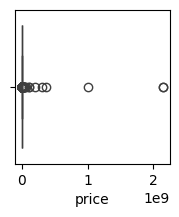

In [12]:
plt.figure(figsize=(2, 2))
sns.boxplot(x=df2['price'], vert=False)
plt.show()

Limitando el eje x del boxplot, podemos encontrar que los valores más cercanos a algún promedio en precio son entre 100 y 200 mil aproximadamente.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


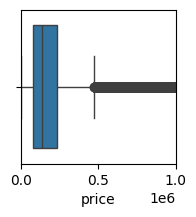

In [13]:
plt.figure(figsize=(2, 2))
sns.boxplot(x=df2['price'], vert=False)
plt.xlim(0, 1000000)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


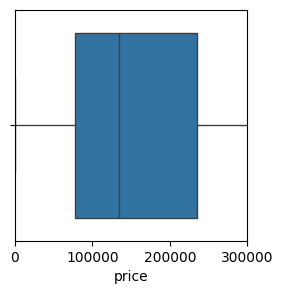

In [14]:
plt.figure(figsize=(3, 3))
sns.boxplot(x=df2['price'], vert=False)
plt.xlim(0, 300000)
plt.show()

Dado que es la columna más importante de nuestro dataset, tenemos que manejar los outliers. Para esto, nos desharemos de aquellos que están más alejados de los percentiles 25 y 75 aproximadamente.

In [15]:
q1 = df2['price'].quantile(0.25)
q3 = df2['price'].quantile(0.75)
IQR = q3 - q1
lower_bound = q1 - 2 * IQR
upper_bound = q3 + 2 * IQR

df2 = df2[(df2['price'] >= lower_bound) & (df2['price'] <= upper_bound)]

Revisamos nuestro boxplot que ahora muestra una distribución más aceptable.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


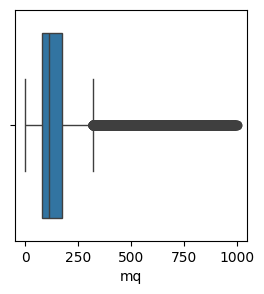

In [16]:
plt.figure(figsize=(3, 3))
sns.boxplot(x=df2['mq'], vert=False)
# plt.xlim(0, 300000)
plt.show()

Realizaremos un proceso similar para manejar outliers en la columna de metros cuadrados.

In [17]:
q1 = df2['mq'].quantile(0.25)
q3 = df2['mq'].quantile(0.75)
IQR = q3 - q1
lower_bound = q1 - 2 * IQR
upper_bound = q3 + 2 * IQR

df2 = df2[(df2['mq'] >= lower_bound) & (df2['mq'] <= upper_bound)]

Ahora hacemos un scatterplot para revisar alguna correlación entre metros cuadrados y precio.

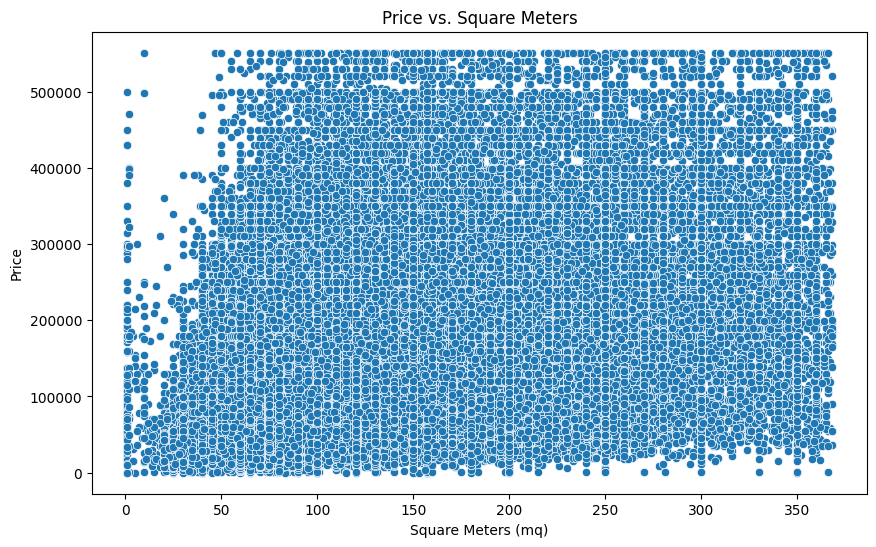

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mq', y='price', data=df2)
plt.xlabel('Square Meters (mq)')
plt.ylabel('Price')
plt.title('Price vs. Square Meters')
plt.show()


Nuestros datos están bastante dispersos, lo que no nos permite a simple vista apreciar alguna relación.

---

Realizaremos más exploración, a ver que otros datos podemos utilizar.

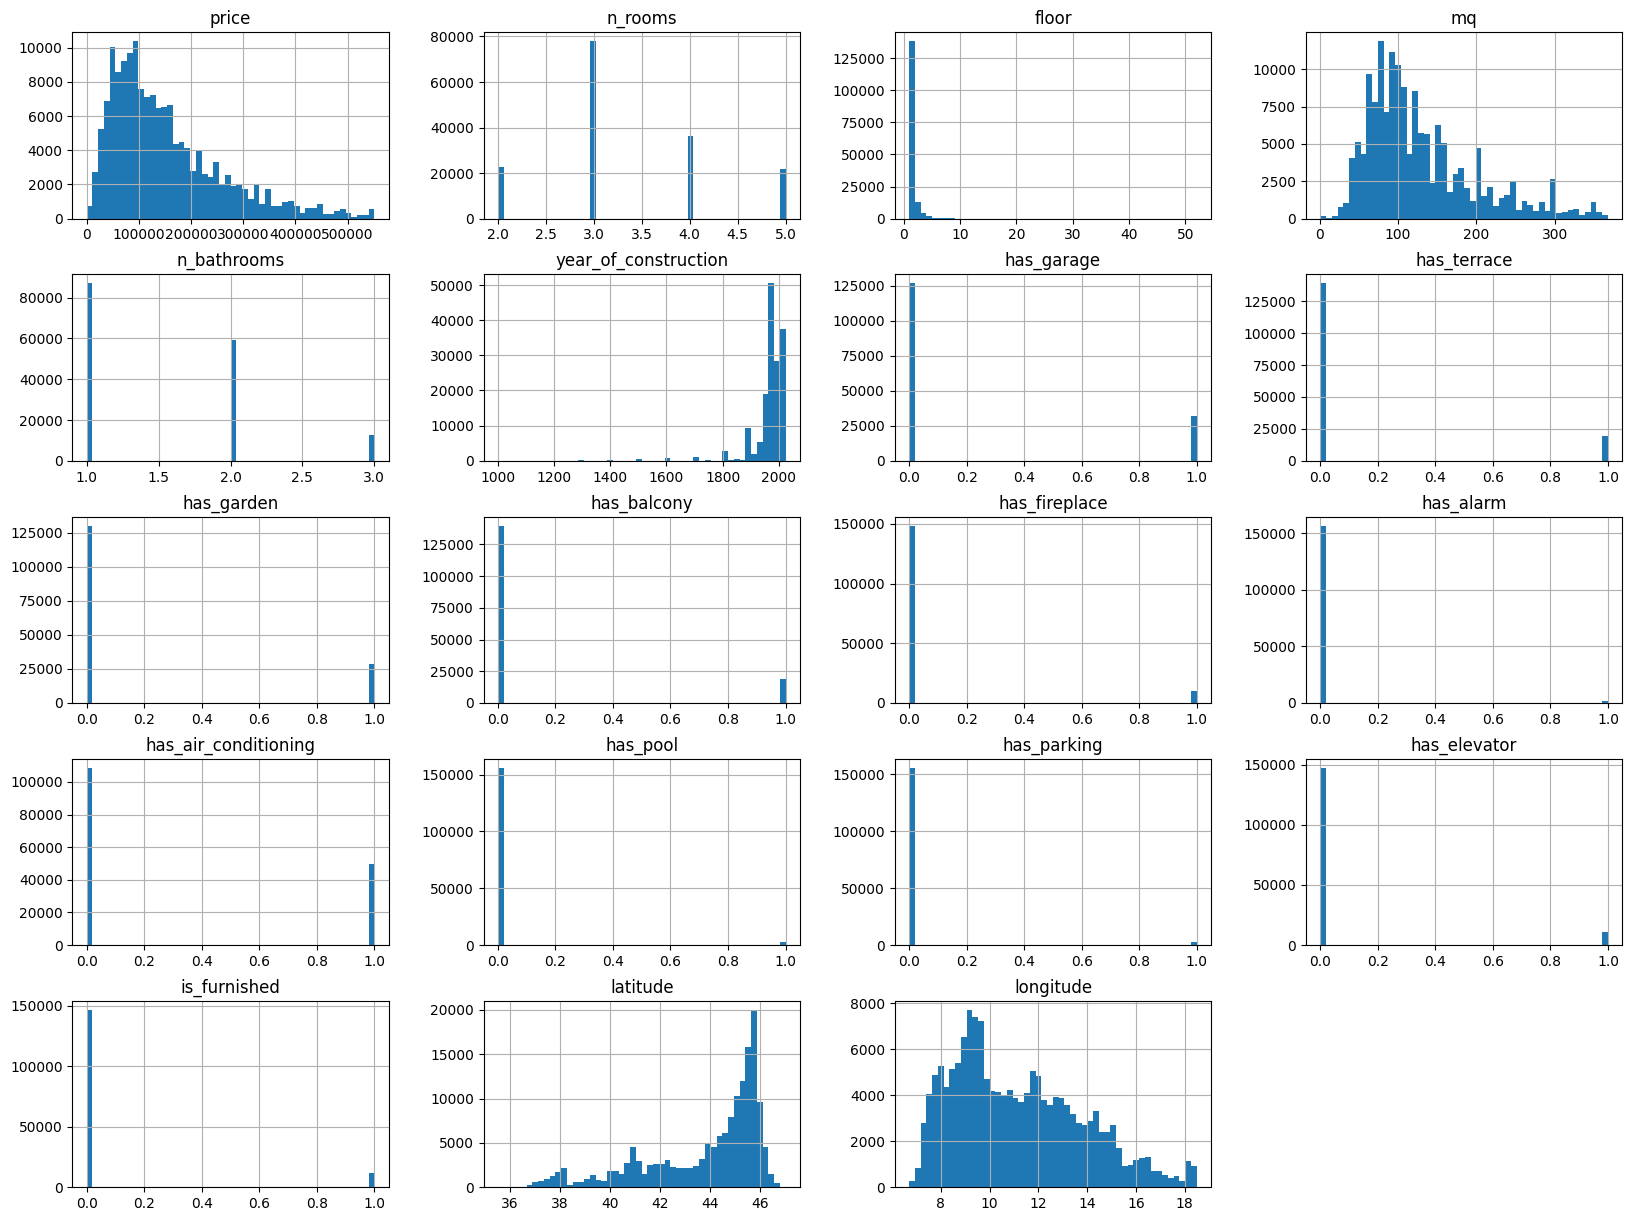

In [19]:
df2.hist(bins=50, figsize=(20,15))
plt.show()

Haremos drop a las columnas de año y piso, ya que con el histograma considero que no nos serán de utilidad tampoco.

In [20]:
df2 = df2.drop(['floor', 'year_of_construction'], axis=1)

Haremos uso de la columna 'energy_class'. Para esto, le asignaremos valores numéricos según su clase, del 1 al 7 siendo aquellos con 'G' 1 y sucesivamente hasta llegar a los 'A' con 7. Para esto también se colapsaron todos los valores adicionales de 'A' como 'A+', 'A1' y otros como simplemente A.

In [21]:
df2['energy_class'] = df2['energy_class'].str.replace('^a.*', 'a', regex=True)
mapping = {'a': 7, 'b': 6, 'c': 5, 'd': 4, 'e': 3, 'f': 2, 'g': 1}
df2['energy_class'] = df2['energy_class'].map(mapping)


Realizamos un scatterplot para ver si se aprecia una relación entre precio y clase de energía:

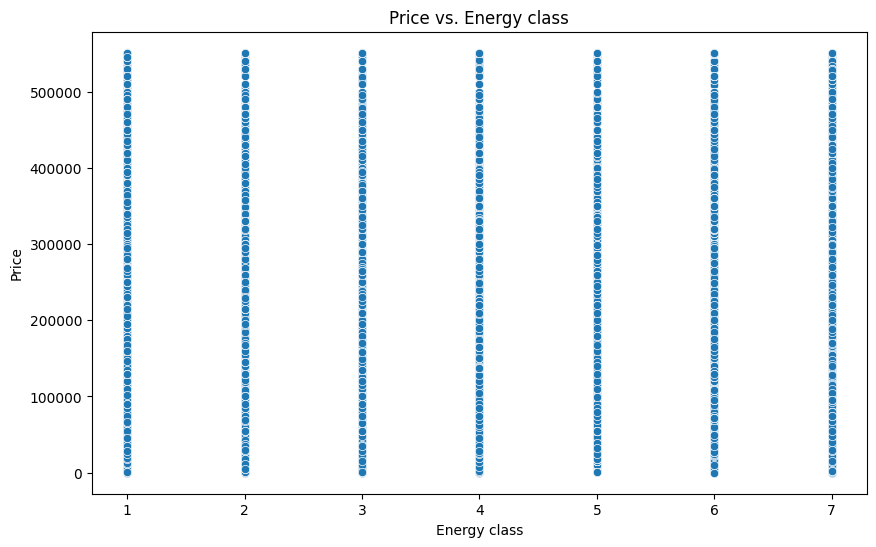

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy_class', y='price', data=df2)
plt.xlabel('Energy class')
plt.ylabel('Price')
plt.title('Price vs. Energy class')
plt.show()


Tampoco es posible identificar alguna relación de precio con energía. Seguimos explorando.

---

Aquí realizo una nueva columna sumando los valores booleanos que contiene el dataset, como garage, chimenea, etc. Asignandole a cada uno su puntuación de "valor agregado". Posterior realizamos un scatterplot más.

In [ ]:
df2['valor_agregado'] = df2['has_garage'].astype(int) + df2['has_terrace'].astype(int) + df2['has_garden'].astype(int)
+ df2['has_air_conditioning'].astype(int) + df2['has_fireplace'].astype(int) + df2['has_alarm'].astype(int) + df2['has_pool'].astype(int)
+ df2['has_parking'].astype(int) + df2['is_furnished'].astype(int) + df2['has_elevator'].astype(int)


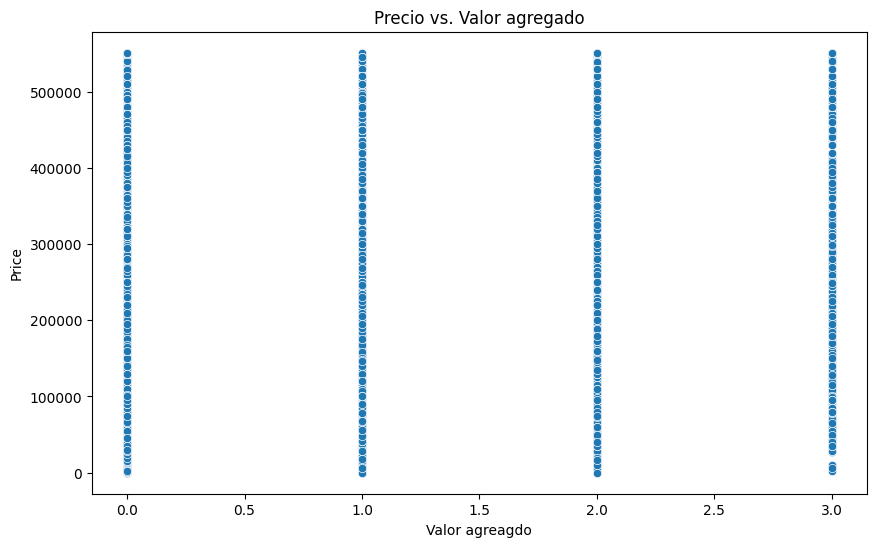

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='valor_agregado', y='price', data=df2)
plt.xlabel('Valor agreagdo')
plt.ylabel('Price')
plt.title('Precio vs. Valor agregado')
plt.show()


Cambiamos los valores de la columna "heating" a 1s y 0s para poder analizarlos también en un scatterplot.

In [ ]:
df2['heating'].fillna('other', inplace=True)
df2['heating'] = df2['heating'].replace({'autonomous': 1, 'other': 0})

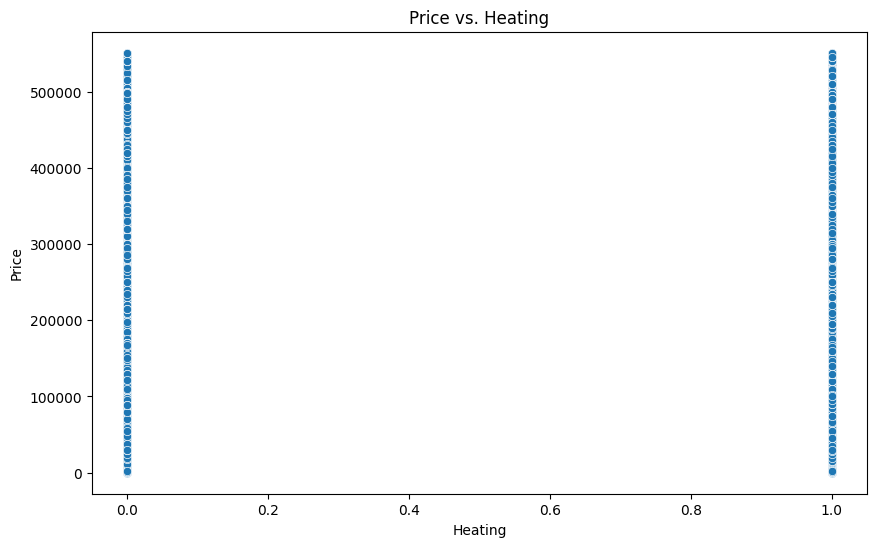

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='heating', y='price', data=df2)
plt.xlabel('Heating')
plt.ylabel('Price')
plt.title('Price vs. Heating')
plt.show()


Al no poder encontrar una relación nuevamente, creo una nueva columna a la cual llamaré "tamaño". Esta columna tendrá una suma aproximada de cuartos, baños, metros cuadrados y utilidades como garaje, terraza, ajrdín, etc. Y arrojará una puntuación. Nuevamente la utilizaremos para realizar un scatterplot.

In [27]:
df2['mq_divided'] = (df2['mq'] // 100).astype(int)
df2['size'] = (df2['has_garage'].astype(int) + df2['has_terrace'].astype(int) + df2['has_garden'].astype(int) +
               df2['mq_divided'].astype(int) + df2['n_rooms'].astype(int) + df2['n_bathrooms'].astype(int) +
               df2['has_pool'].astype(int) + df2['has_parking'].astype(int) + df2['has_elevator'].astype(int))


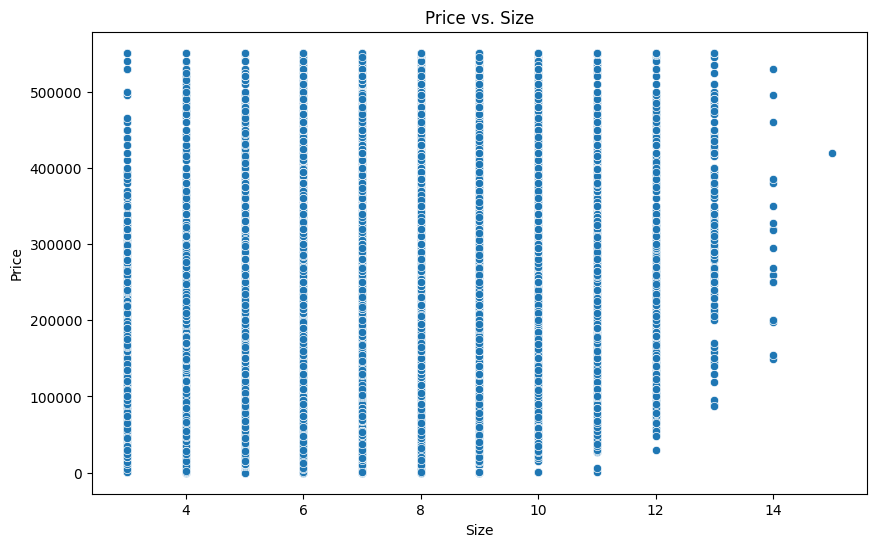

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='size', y='price', data=df2)
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Price vs. Size')
plt.show()


Aunque sea se puede notar una distribución algo diferente a las demás con esta nueva columna. Realizaremos ahora un heatmap.

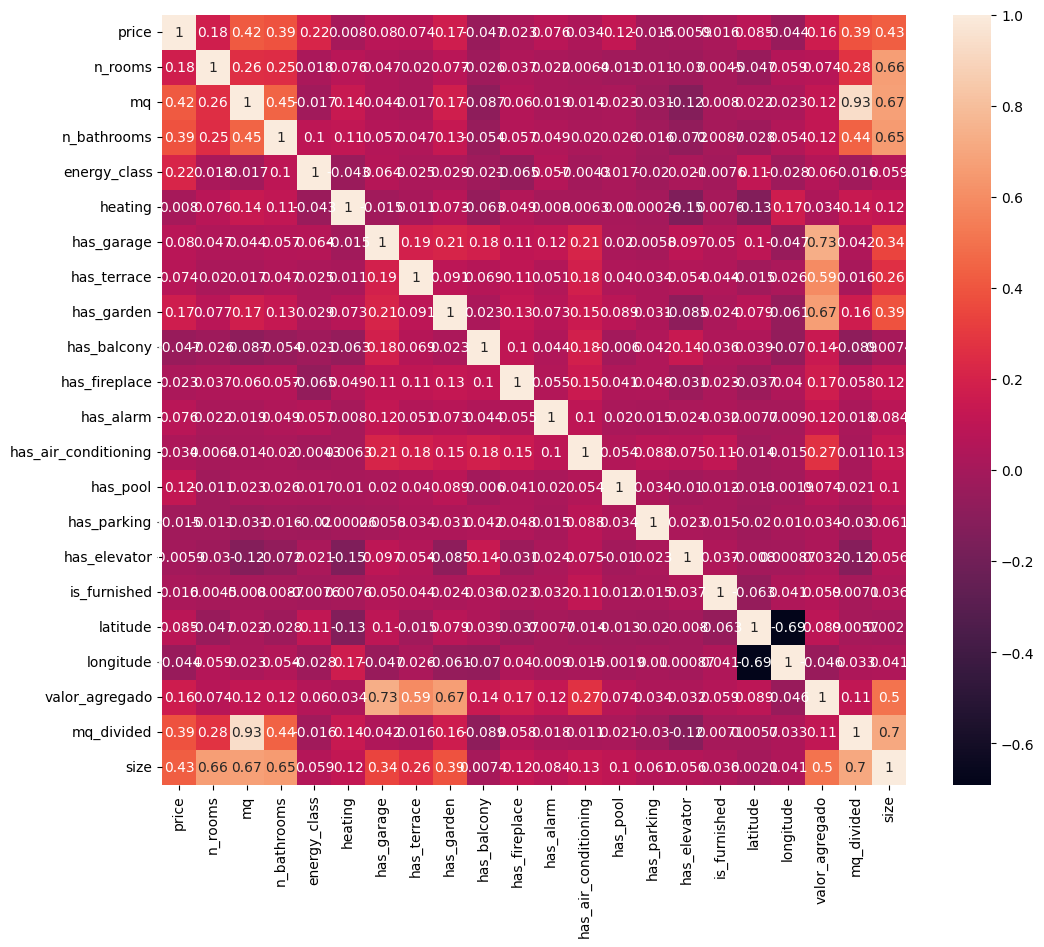

In [29]:
# Se seleccionan solo datos numéricos.
numerical_df = df2.select_dtypes(include=['number'])

plt.figure(figsize=(12, 10))
sns.heatmap(numerical_df.corr(), annot=True)
plt.show()

## **Reducción de dimensionalidad**

A partir de esta sección aplicamos técnicas de reducción de dimensionalidad, en particular PCA y LDA.

In [30]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE

In [31]:
X = numerical_df.loc[:, numerical_df.columns != 'price']
y = df2['price'].values

Utilizando chi2, podemos notar que nos recomienda las columnas,'mq', 'energy_class', 'valor_agregado', 'mq_divided', 'size'.

In [32]:
from sklearn.feature_selection import SelectKBest, chi2

### Applying feature selection method
chi2_selector = SelectKBest(score_func=chi2, k=5)  # change k
chi2_selector.fit_transform(X, y)

# show feature selection
selected_features = chi2_selector.get_support()
print('The selected features are:', list(X.columns[selected_features]))

The selected features are: ['mq', 'energy_class', 'valor_agregado', 'mq_divided', 'size']


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


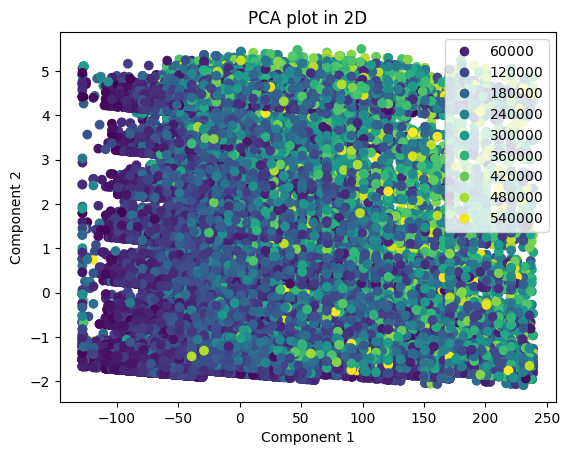

In [33]:
X2 = X[list(X.columns[selected_features])]
X_PCA = PCA(n_components=2).fit_transform(X2)

scatter = plt.scatter(X_PCA[:,0], X_PCA[:,1], c=y)
plt.title('PCA plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


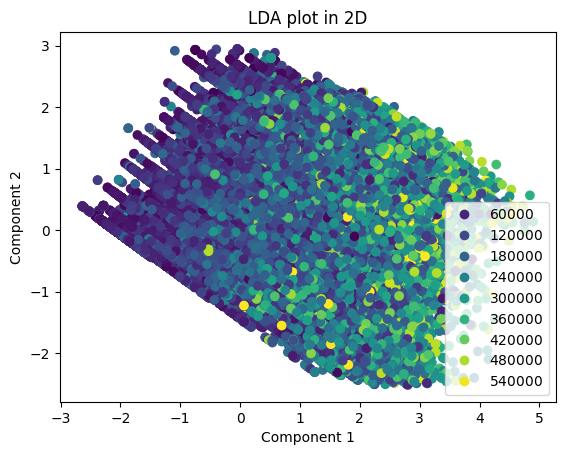

In [34]:
X_LDA = LDA(n_components=2).fit_transform(X2,y)

scatter = plt.scatter(X_LDA[:,0], X_LDA[:,1], c=y)
plt.title('LDA plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())
plt.show()

PCA y LDA no logran realizar un análisis satisfactorio de los datos.

In [35]:
#X_TSNE = TSNE(n_components=2).fit_transform(X2)

#scatter = plt.scatter(X_TSNE[:,0], X_TSNE[:,1], c=y)
#plt.title('t-SNE plot in 2D')
#plt.xlabel('Component 1')
#plt.ylabel('Component 2')
#plt.legend(*scatter.legend_elements())
#plt.show()

Utilizamos un modelo de regresión lineal, para sacar una puntación de los datos analizados.

In [36]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))

0.29367342809505403


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


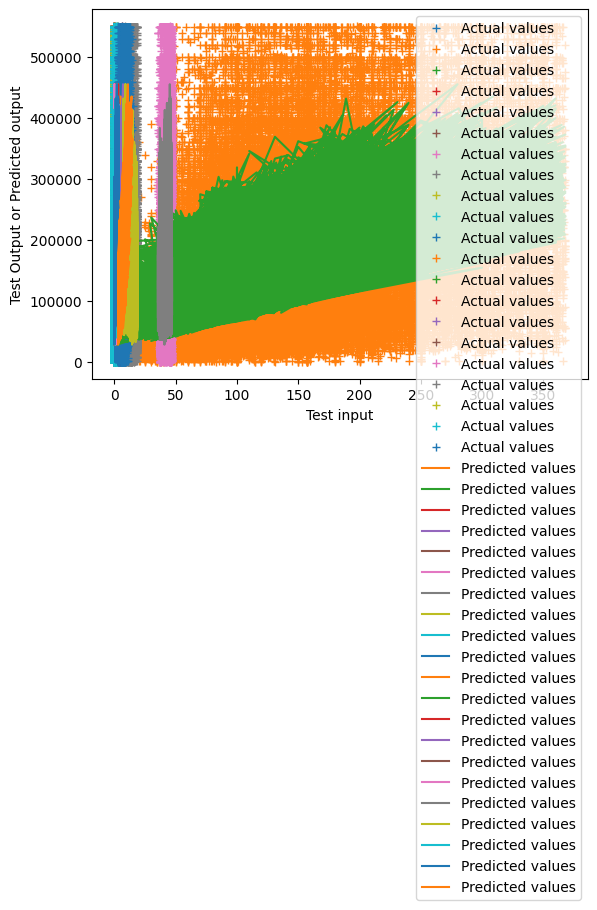

In [37]:
y_pred = reg.predict(X)
# Plot the regression line with actual data pointa
plt.plot(X, y, '+', label='Actual values')
plt.plot(X, y_pred, label='Predicted values')
plt.xlabel('Test input')
plt.ylabel('Test Output or Predicted output')
plt.legend()
plt.show()

## Entrenamiento y Testing

---

Utilizando regresión lineal, Ridge, Lasso y Random Forest. Analizando los datos vemos que les va bastante bien a Lasso y Random Forest.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print(f'Model: {model_name}')
    print(f'Train R^2: {r2_score(y_train, y_pred_train):.4f}')
    print(f'Test R^2: {r2_score(y_test, y_pred_test):.4f}')
    print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}')
    print('-'*40)

    # Plot the predictions vs real values
    plt.figure(figsize=(4, 4))
    plt.scatter(y_test, y_pred_test, label='Predictions', color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted - {model_name}')
    plt.legend()
    plt.show()

Model: Linear Regression
Train R^2: 0.2956
Test R^2: 0.2861
Test RMSE: 90553.2461
----------------------------------------


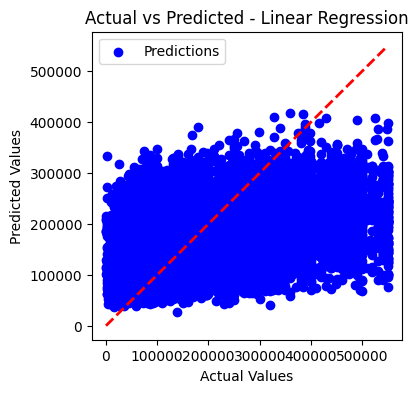

Model: Ridge Regression
Train R^2: 0.2956
Test R^2: 0.2861
Test RMSE: 90553.2745
----------------------------------------


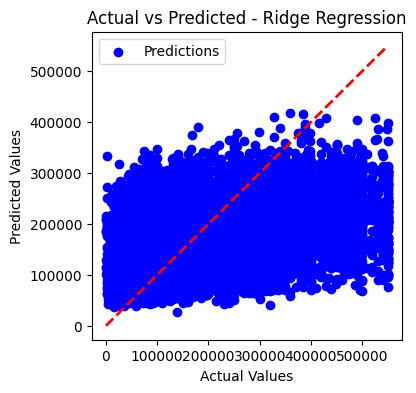

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.528e+14, tolerance: 1.438e+11
  model = cd_fast.enet_coordinate_descent(


Model: Lasso Regression
Train R^2: 0.2956
Test R^2: 0.2861
Test RMSE: 90553.2594
----------------------------------------


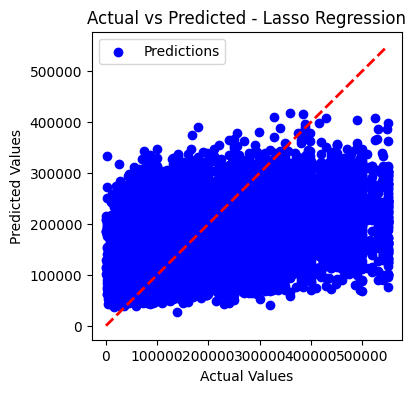

Model: Random Forest Regression
Train R^2: 0.9352
Test R^2: 0.5333
Test RMSE: 73214.4945
----------------------------------------


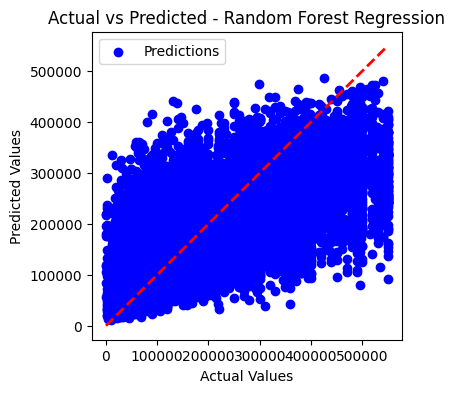

In [41]:
# 1. Linear Regression
linear_reg = LinearRegression()
evaluate_model(linear_reg, X_train, X_test, y_train, y_test, 'Linear Regression')

# 2. Ridge Regression
ridge_reg = Ridge(alpha=1.0)
evaluate_model(ridge_reg, X_train, X_test, y_train, y_test, 'Ridge Regression')

# 3. Lasso Regression
lasso_reg = Lasso(alpha=0.1)
evaluate_model(lasso_reg, X_train, X_test, y_train, y_test, 'Lasso Regression')

# 4. Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
evaluate_model(rf_reg, X_train, X_test, y_train, y_test, 'Random Forest Regression')

In [45]:
# import the class
from sklearn.linear_model import LogisticRegression

df_test = pd.read_csv('test_housing_data_italy.csv')

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# defining the dependent and independent variables
X_prueba = df_test.loc[:, df_test.columns != 'price']
y_prueba = df_test['price']


y_pred = logreg.predict(X_prueba)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_prueba, y_prueba)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- availability
- floor
- location
- status
- timestamp
- ...
Feature names seen at fit time, yet now missing:
- mq_divided
- size
- valor_agregado
